In [3]:
import pandas as pd
import numpy as np

df = pd.read_excel('/content/Intern Assignment.xlsx')

In [4]:
df

,company name,GST,website
0,A M STEEL,27AACPG2821R1ZJ,https://www.indiamart.com/am-steels-mumbai/abo...
1,KALPATARU PROJECTS INTERNATIONAL LIMITED,27AAACK8387R1ZJ,https://kalpataruprojects.com/
2,SYMCOM EXIM PRIVATE LIMITED,27AASCS2782C1Z1,https://www.symcomgroup.com/
3,A K STEELS,27ABAFA1354Q1ZA,https://www.indiamart.com/a-k-steels-kolhapur/
4,NIRMAL WIRES PRIVATE LIMITED,27AAACN9805H1ZC,https://www.nirmalwires.com/
...,...,...,...
160,PNC INFRATECH LIMITED,27AACCP0377Q2ZV,https://www.pncinfratech.com/
161,ECONOMIC FORGE PVT LTD,27AAACE6537B1ZY,https://www.tmia.in/DirectoryDetails.asp?id=84...
162,KAMLESH KUMAR SINGH ENGINEERS PRIVATE LIMITED,27AADCK5251H1ZK,https://www.kksepl.com/
163,SHRI SANT SADHGURU BALUMAMA BUILDING PRODUCTS ...,27ABECS7738R1ZC,https://www.zaubacorp.com/company/SHRI-SANT-SA...


In [5]:
df = df.dropna(subset=["website"])
df.reset_index(drop=True, inplace=True)
print(f"Total vendors with valid URLs: {len(df)}")

Total vendors with valid URLs: 164


In [6]:
df.head()

,company name,GST,website
0,A M STEEL,27AACPG2821R1ZJ,https://www.indiamart.com/am-steels-mumbai/abo...
1,KALPATARU PROJECTS INTERNATIONAL LIMITED,27AAACK8387R1ZJ,https://kalpataruprojects.com/
2,SYMCOM EXIM PRIVATE LIMITED,27AASCS2782C1Z1,https://www.symcomgroup.com/
3,A K STEELS,27ABAFA1354Q1ZA,https://www.indiamart.com/a-k-steels-kolhapur/
4,NIRMAL WIRES PRIVATE LIMITED,27AAACN9805H1ZC,https://www.nirmalwires.com/


In [7]:
# Keywords to exclude (e.g., infrastructure, property, steel pipes)
exclude_keywords = [
    "infra", "property", "realtech", "realtor", "steel pipes",
    "steel tubes", "trading", "fabric", "construction", "housing", "rubber", "chemicals", "textiles", "logistics", "shipping",
    "energy", "solar", "renewable", "sugar equipment", "grating","automotive", "auto parts", "hardware", "tools", "fasteners",
    "bearings", "forgings", "castings","pipes", "tubes", "fittings", "plumbing", "valves", "nozzles",
    "tubular", "hollow sections","electrical", "electronics", "power transmission", "switchgear",
    "cables", "transformers", "lighting", "wires", "electrode","infracon", "infratech", "construction", "builders", "developers",
    "projects", "contractors", "real estate", "housing", "property","steel trader", "steel merchant", "steel supplier", "steel sales",
    "iron & steel", "metal mart", "metalloys", "rolling mills", "re-rolling",
    "steel corporation", "steel center", "steel industries", "steel impex"
]

# Filter out rows where company name contains excluded keywords
filtered_df = df[
    ~df["company name"].str.lower().str.contains("|".join(exclude_keywords), na=False)
]
print(f"Vendors after name filtering: {len(filtered_df)}")

Vendors after name filtering: 126


In [8]:
import requests
from bs4 import BeautifulSoup

def scrape_about_us(url):
    try:
        headers = {"User-Agent": "Mozilla/5.0"}
        response = requests.get(url, headers=headers, timeout=10)
        soup = BeautifulSoup(response.text, "html.parser")

        # Prioritize "about-us" or similar sections
        about_sections = soup.find_all(["section", "div"], class_=lambda x: x and "about" in x.lower())
        if not about_sections:
            about_sections = soup.find_all(["p", "article"])  # Fallback

        text = " ".join([section.get_text(strip=True) for section in about_sections])
        return text if text else "No 'About Us' section found."
    except Exception as e:
        return f"Scraping failed: {str(e)}"

# Test the function (optional)
print(scrape_about_us("https://www.elecon.com"))

For a richer surfing experience on our website, please update your browser.Update my browser now! × Engineered for mission critical applications. UPTO 1.1 Mtr. DIA UPTO 1.1 Mtr. DIA Dependable service just a call away. Driven by experience and knowledge. ELECON offers a variety of CMS designed to enhance the reliability and efficiency of machinery. Welcome to Elecon Engineering, a trailblazer since 1951 and was founded by Late Shri Ishwarbhai B. Patel. Elecon journey began in manufacturing conveyor systems for the mining industry, and rapidly evolved into a key player inMaterial Handling Equipmentrelated EPC projects across India. Today, Elecon stands tall as Asia's largest IndustrialGearboxManufacturer from India, with a global footprint across Asia, Middle East, USA, UK and other parts of Europe and also in Africa. Power transmission solutionsincludeHelical and Spiral Bevel Gear and Gearboxes,Worm gears,Couplings,Planetary gears,High speed gears, andcustom-built gearboxes. Elecon pio

In [9]:
filtered_df["about_text"] = filtered_df["website"].apply(scrape_about_us)

<ipython-input-9-a7d298d2577d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["about_text"] = filtered_df["website"].apply(scrape_about_us)


In [10]:
df_f = filtered_df.copy()

In [16]:
df_f

,company name,GST,website,about_text
0,A M STEEL,27AACPG2821R1ZJ,https://www.indiamart.com/am-steels-mumbai/abo...,No 'About Us' section found.
2,SYMCOM EXIM PRIVATE LIMITED,27AASCS2782C1Z1,https://www.symcomgroup.com/,An appropriate representation of the requested...
3,A K STEELS,27ABAFA1354Q1ZA,https://www.indiamart.com/a-k-steels-kolhapur/,No 'About Us' section found.
5,IDEAL PROFILERS,27AADFI8634D1ZF,https://www.idealprofilers.com/,You don't have permission to access / on this ...
6,SURYA FERROUS ALLOYS PRIVATE LIMITED,27AAHCS8596H1ZM,https://www.suryaalloy.com/,No 'About Us' section found.
...,...,...,...,...
157,Suncity Sheets Private Limited,27AAHCS3761Q1ZM,https://www.suncitysheets.com/,An appropriate representation of the requested...
160,ECONOMIC FORGE PVT LTD,27AAACE6537B1ZY,https://www.tmia.in/DirectoryDetails.asp?id=84...,Home>Directory>> ECONOMIC FORGE PVT. LTD. RAV...
161,KAMLESH KUMAR SINGH ENGINEERS PRIVATE LIMITED,27AADCK5251H1ZK,https://www.kksepl.com/,An appropriate representation of the requested...
162,SHRI SANT SADHGURU BALUMAMA BUILDING PRODUCTS ...,27ABECS7738R1ZC,https://www.zaubacorp.com/company/SHRI-SANT-SA...,No 'About Us' section found.


In [22]:
# Add a column for description length
filtered_df["desc_length"] = filtered_df["about_text"].apply(lambda x: len(str(x)))
# Flag rows where description is too short or scraping failed
filtered_df["scraping_status"] = filtered_df.apply(
    lambda row: "Failed" if row["desc_length"] < 150 or row["about_text"].startswith("Scraping failed")
               else "Success",
    axis=1
)

# Get failed URLs (short descriptions or errors)
failed_urls = filtered_df[filtered_df["scraping_status"] == "Failed"]["website"].tolist()
print(f"Websites needing Selenium/Scrapy: {len(failed_urls)}")

Websites needing Selenium/Scrapy: 46


<ipython-input-22-a7bc068dc09e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["desc_length"] = filtered_df["about_text"].apply(lambda x: len(str(x)))
<ipython-input-22-a7bc068dc09e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["scraping_status"] = filtered_df.apply(


In [24]:
filtered_df["scraping_status"] = filtered_df.apply(
    lambda row: "Failed" if row["desc_length"] < 150 or row["about_text"].startswith("Scraping failed")
               else "Success",
    axis=1
)
df_1 = filtered_df[filtered_df["scraping_status"] == "Failed"]
df_1.head()

<ipython-input-24-13f76510e641>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["scraping_status"] = filtered_df.apply(


,company name,GST,website,about_text,desc_length,scraping_status
0,A M STEEL,27AACPG2821R1ZJ,https://www.indiamart.com/am-steels-mumbai/abo...,No 'About Us' section found.,28,Failed
2,SYMCOM EXIM PRIVATE LIMITED,27AASCS2782C1Z1,https://www.symcomgroup.com/,An appropriate representation of the requested...,132,Failed
3,A K STEELS,27ABAFA1354Q1ZA,https://www.indiamart.com/a-k-steels-kolhapur/,No 'About Us' section found.,28,Failed
5,IDEAL PROFILERS,27AADFI8634D1ZF,https://www.idealprofilers.com/,You don't have permission to access / on this ...,63,Failed
6,SURYA FERROUS ALLOYS PRIVATE LIMITED,27AAHCS8596H1ZM,https://www.suryaalloy.com/,No 'About Us' section found.,28,Failed


In [25]:
!pip install playwright
!playwright install

Playwright Host validation warning: 
╔══════════════════════════════════════════════════════╗
║ Host system is missing dependencies to run browsers. ║
║ Missing libraries:                                   ║
║     libwoff2dec.so.1.0.2                             ║
║     libgstgl-1.0.so.0                                ║
║     libgstcodecparsers-1.0.so.0                      ║
║     libavif.so.13                                    ║
║     libharfbuzz-icu.so.0                             ║
║     libenchant-2.so.2                                ║
║     libsecret-1.so.0                                 ║
║     libhyphen.so.0                                   ║
║     libmanette-0.2.so.0                              ║
╚══════════════════════════════════════════════════════╝
    at validateDependenciesLinux (/usr/local/lib/python3.11/dist-packages/playwright/driver/package/lib/server/registry/dependencies.js:269:9)
    at async Registry._validateHostRequirements (/usr/local/lib/python3.11/dist

In [26]:
from playwright.sync_api import sync_playwright
from bs4 import BeautifulSoup
import pandas as pd
from tqdm.notebook import tqdm

def extract_about_text(soup):
    selectors = ["div", "section", "p"]
    about_candidates = []

    for tag in selectors:
        about_candidates += soup.find_all(tag, id=lambda x: x and "about" in x.lower())
        about_candidates += soup.find_all(tag, class_=lambda x: x and "about" in x.lower())

    about_texts = [el.get_text(separator=" ", strip=True) for el in about_candidates if el.get_text(strip=True)]
    about_text = " ".join(about_texts)

    return about_text.strip() if len(about_text) > 100 else None


In [27]:
def scrape_about_us(url):
    try:
        with sync_playwright() as p:
            browser = p.chromium.launch(headless=True)
            page = browser.new_page()
            page.goto(url, timeout=60000)
            page.wait_for_load_state("load")

            soup = BeautifulSoup(page.content(), "html.parser")
            about_text = extract_about_text(soup)

            # Fallback: Click on “About” link
            if not about_text:
                links = page.query_selector_all("a")
                for link in links:
                    text = link.inner_text().strip().lower()
                    if "about" in text and "contact" not in text:
                        try:
                            with page.expect_navigation():
                                link.click()
                            page.wait_for_load_state("load")
                            soup = BeautifulSoup(page.content(), "html.parser")
                            about_text = extract_about_text(soup)
                            if about_text:
                                break
                        except:
                            continue

            browser.close()
            return about_text if about_text else "[NOT FOUND]"

    except Exception as e:
        return f"[ERROR]: {str(e)}"


In [28]:
tqdm.pandas()
df_1['about_section'] = df_1['website'].progress_apply(scrape_about_us)

  0%|          | 0/46 [00:00<?, ?it/s]

<ipython-input-28-053d2fcf8a61>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['about_section'] = df_1['website'].progress_apply(scrape_about_us)


In [41]:
df_f = df_f.reset_index(drop=True)

In [45]:
# Drop entries where about_text is 'No 'About Us' section found.'
filtered_df = filtered_df[filtered_df["scraping_status"] != "Failed"]


In [46]:
filtered_df

,company name,GST,website,about_text,desc_length,scraping_status
7,KUSHAAL METAL INDUSTRIES,27AFYPB0563Q1ZR,https://www.kushalmetal.net/,Welcome toKushal MetalDinesh Hardware Mart was...,1602,Success
8,APPLE STEELS,27AAEPS4893D1ZE,https://www.applesteels.com/,Welcome to Our CompanyApple SteelsEstablished ...,2978,Success
9,GILLANDERS ARBUTHNOT AND COMPANY LIMITED,27AAACG9832F4ZH,https://www.gillandersarbuthnot.com/,Gillanders Arbuthnot & Co. Ltd. (GACL) origina...,167,Success
11,ELECON ENGINEERING CO. LTD,27AAACE4644D2ZX,https://www.elecon.com/,For a richer surfing experience on our website...,1810,Success
12,MSTC LIMITED,27AACCM0021E1Z7,https://www.mstcindia.co.in/,भारत सरकार के इस्पात मंत्रालय के प्रशासनिक निय...,2259,Success
...,...,...,...,...,...,...
151,TIL LIMITED,27AABCT0704G2ZQ,https://www.tilindia.in/,TIL Limited was formerly known as Tractors Ind...,2342,Success
152,KILBURN ENGINEERING LIMITED,27AABCK3421H1ZU,https://www.kilburnengg.com/,"Kilburn excels in designing, manufacturing, an...",1440,Success
156,METAFLEX DOORS INDIA PRIVATE LIMITED,27AAECM9216H1ZC,https://www.metaflexdoors.com/,About MetaflexLearn more about Metaflex!News &...,529,Success
160,ECONOMIC FORGE PVT LTD,27AAACE6537B1ZY,https://www.tmia.in/DirectoryDetails.asp?id=84...,Home>Directory>> ECONOMIC FORGE PVT. LTD. RAV...,545,Success


In [48]:
df_1.drop(['about_text', 'desc_length', 'scraping_status'], axis=1, inplace=True)

<ipython-input-48-8098986793b9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.drop(['about_text', 'desc_length', 'scraping_status'], axis=1, inplace=True)


In [55]:
df_1 = df_1[df_1["about_section"] != "[NOT FOUND]"]
df_1 = df_1[df_1['about_section'].str.len() >= 200]
df_1

,company name,GST,website,about_section,about_section_length
34,ARTSON ENGINEERING LTD,27AAACA5921H1ZW,https://artson.net/,"Artson Limited is an Engineering, Manufacturin...",1206
65,TUSHAR INDUSTRY,27AABFT9715A1ZC,https://www.tusharindustries.com/,About Us TUSHAR INDUSTRIES is a venture of GUR...,391
74,KEC INTERNATIONAL LTD,27AACCK5599H1Z2,https://www.kecrpg.com/,Empowered by a mindset driven to outperform an...,1036
86,JAIN STEEL,27AAQPJ2199H1Z8,https://www.jainsteels.com/,Right since inception in 1965 by Late Shri P.S...,545
112,STAINOX ALLOYS PRIVATE LIMITED,27AARCS8137Q1Z8,https://www.stainox.com/,We are Stainox We Deliver results with solid d...,1153
118,M/S S LOKHANDWALA,27AAWFS5374B1ZR,https://www.lokhandwalapk.com/,About Lokhandwala Group Lokhandwala Group of C...,838
136,EDICON PNEUMATIC TOOL CO PVT LTD,27AABCE3179L1ZC,https://www.edicon.co.in/,Edicon is a 40-year-oldspecialized producer an...,1286
155,MANGALA INDUSTRIES,27ABCFM4799F1ZW,https://www.mangalindustries.com/,"About Mangal Industries Mangal Industries, est...",2870
157,Suncity Sheets Private Limited,27AAHCS3761Q1ZM,https://www.suncitysheets.com/,PIONEER IN STAINLESS STEEL Welcome To Suncity ...,974


In [59]:
df_f

,company name,GST,website,about_text
0,A M STEEL,27AACPG2821R1ZJ,https://www.indiamart.com/am-steels-mumbai/abo...,No 'About Us' section found.
1,SYMCOM EXIM PRIVATE LIMITED,27AASCS2782C1Z1,https://www.symcomgroup.com/,An appropriate representation of the requested...
2,A K STEELS,27ABAFA1354Q1ZA,https://www.indiamart.com/a-k-steels-kolhapur/,No 'About Us' section found.
3,IDEAL PROFILERS,27AADFI8634D1ZF,https://www.idealprofilers.com/,You don't have permission to access / on this ...
4,SURYA FERROUS ALLOYS PRIVATE LIMITED,27AAHCS8596H1ZM,https://www.suryaalloy.com/,No 'About Us' section found.
...,...,...,...,...
121,Suncity Sheets Private Limited,27AAHCS3761Q1ZM,https://www.suncitysheets.com/,An appropriate representation of the requested...
122,ECONOMIC FORGE PVT LTD,27AAACE6537B1ZY,https://www.tmia.in/DirectoryDetails.asp?id=84...,Home>Directory>> ECONOMIC FORGE PVT. LTD. RAV...
123,KAMLESH KUMAR SINGH ENGINEERS PRIVATE LIMITED,27AADCK5251H1ZK,https://www.kksepl.com/,An appropriate representation of the requested...
124,SHRI SANT SADHGURU BALUMAMA BUILDING PRODUCTS ...,27ABECS7738R1ZC,https://www.zaubacorp.com/company/SHRI-SANT-SA...,No 'About Us' section found.


In [75]:
filtered_df.drop(['desc_length', 'scraping_status'], axis=1, inplace=True)

KeyError: "['desc_length', 'scraping_status'] not found in axis"

In [78]:
df_0 = filtered_df
df_0.reset_index(drop=True, inplace=True)
df_0

,company name,GST,website,about_text
0,KUSHAAL METAL INDUSTRIES,27AFYPB0563Q1ZR,https://www.kushalmetal.net/,Welcome toKushal MetalDinesh Hardware Mart was...
1,APPLE STEELS,27AAEPS4893D1ZE,https://www.applesteels.com/,Welcome to Our CompanyApple SteelsEstablished ...
2,GILLANDERS ARBUTHNOT AND COMPANY LIMITED,27AAACG9832F4ZH,https://www.gillandersarbuthnot.com/,Gillanders Arbuthnot & Co. Ltd. (GACL) origina...
3,ELECON ENGINEERING CO. LTD,27AAACE4644D2ZX,https://www.elecon.com/,For a richer surfing experience on our website...
4,MSTC LIMITED,27AACCM0021E1Z7,https://www.mstcindia.co.in/,भारत सरकार के इस्पात मंत्रालय के प्रशासनिक निय...
...,...,...,...,...
75,TIL LIMITED,27AABCT0704G2ZQ,https://www.tilindia.in/,TIL Limited was formerly known as Tractors Ind...
76,KILBURN ENGINEERING LIMITED,27AABCK3421H1ZU,https://www.kilburnengg.com/,"Kilburn excels in designing, manufacturing, an..."
77,METAFLEX DOORS INDIA PRIVATE LIMITED,27AAECM9216H1ZC,https://www.metaflexdoors.com/,About MetaflexLearn more about Metaflex!News &...
78,ECONOMIC FORGE PVT LTD,27AAACE6537B1ZY,https://www.tmia.in/DirectoryDetails.asp?id=84...,Home>Directory>> ECONOMIC FORGE PVT. LTD. RAV...


In [81]:
df_1.drop(['about_section_length'], axis=1, inplace=True)

In [83]:
df_1 = df_1.rename(columns={'about_section': 'about_text'})

In [84]:
df_1

,company name,GST,website,about_text
34,ARTSON ENGINEERING LTD,27AAACA5921H1ZW,https://artson.net/,"Artson Limited is an Engineering, Manufacturin..."
65,TUSHAR INDUSTRY,27AABFT9715A1ZC,https://www.tusharindustries.com/,About Us TUSHAR INDUSTRIES is a venture of GUR...
74,KEC INTERNATIONAL LTD,27AACCK5599H1Z2,https://www.kecrpg.com/,Empowered by a mindset driven to outperform an...
86,JAIN STEEL,27AAQPJ2199H1Z8,https://www.jainsteels.com/,Right since inception in 1965 by Late Shri P.S...
112,STAINOX ALLOYS PRIVATE LIMITED,27AARCS8137Q1Z8,https://www.stainox.com/,We are Stainox We Deliver results with solid d...
118,M/S S LOKHANDWALA,27AAWFS5374B1ZR,https://www.lokhandwalapk.com/,About Lokhandwala Group Lokhandwala Group of C...
136,EDICON PNEUMATIC TOOL CO PVT LTD,27AABCE3179L1ZC,https://www.edicon.co.in/,Edicon is a 40-year-oldspecialized producer an...
155,MANGALA INDUSTRIES,27ABCFM4799F1ZW,https://www.mangalindustries.com/,"About Mangal Industries Mangal Industries, est..."
157,Suncity Sheets Private Limited,27AAHCS3761Q1ZM,https://www.suncitysheets.com/,PIONEER IN STAINLESS STEEL Welcome To Suncity ...


In [85]:
df_final = pd.concat([df_0, df_1], ignore_index=True)
df_final

,company name,GST,website,about_text
0,KUSHAAL METAL INDUSTRIES,27AFYPB0563Q1ZR,https://www.kushalmetal.net/,Welcome toKushal MetalDinesh Hardware Mart was...
1,APPLE STEELS,27AAEPS4893D1ZE,https://www.applesteels.com/,Welcome to Our CompanyApple SteelsEstablished ...
2,GILLANDERS ARBUTHNOT AND COMPANY LIMITED,27AAACG9832F4ZH,https://www.gillandersarbuthnot.com/,Gillanders Arbuthnot & Co. Ltd. (GACL) origina...
3,ELECON ENGINEERING CO. LTD,27AAACE4644D2ZX,https://www.elecon.com/,For a richer surfing experience on our website...
4,MSTC LIMITED,27AACCM0021E1Z7,https://www.mstcindia.co.in/,भारत सरकार के इस्पात मंत्रालय के प्रशासनिक निय...
...,...,...,...,...
84,STAINOX ALLOYS PRIVATE LIMITED,27AARCS8137Q1Z8,https://www.stainox.com/,We are Stainox We Deliver results with solid d...
85,M/S S LOKHANDWALA,27AAWFS5374B1ZR,https://www.lokhandwalapk.com/,About Lokhandwala Group Lokhandwala Group of C...
86,EDICON PNEUMATIC TOOL CO PVT LTD,27AABCE3179L1ZC,https://www.edicon.co.in/,Edicon is a 40-year-oldspecialized producer an...
87,MANGALA INDUSTRIES,27ABCFM4799F1ZW,https://www.mangalindustries.com/,"About Mangal Industries Mangal Industries, est..."


In [87]:
pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 12.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=f192e25df5abc319f58bd6009e6c3f25a8f3c57ab714dd107ae0731b73e43b0b
  Stored in directory: /root/.cache/pip/wheels/0a/f2/b2/e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
Successfully built langdetect


In [88]:
from langdetect import detect, LangDetectException

def is_english(text):
    try:
        # Handle NaN or empty strings
        if pd.isna(text) or not str(text).strip():
            return False
        return detect(str(text)) == 'en'
    except LangDetectException:
        return False  # If language detection fails, exclude it

# Apply the function to filter English descriptions only
df = df_final[df_final["about_text"].apply(is_english)].copy()

In [89]:
df

,company name,GST,website,about_text
0,KUSHAAL METAL INDUSTRIES,27AFYPB0563Q1ZR,https://www.kushalmetal.net/,Welcome toKushal MetalDinesh Hardware Mart was...
1,APPLE STEELS,27AAEPS4893D1ZE,https://www.applesteels.com/,Welcome to Our CompanyApple SteelsEstablished ...
2,GILLANDERS ARBUTHNOT AND COMPANY LIMITED,27AAACG9832F4ZH,https://www.gillandersarbuthnot.com/,Gillanders Arbuthnot & Co. Ltd. (GACL) origina...
3,ELECON ENGINEERING CO. LTD,27AAACE4644D2ZX,https://www.elecon.com/,For a richer surfing experience on our website...
5,SEEMA ENTERPRISES,27ABLPK3457H1ZF,https://seemaenterprisesbpl.in/,We at SEEMA ENTERPRISES through our manufactur...
...,...,...,...,...
84,STAINOX ALLOYS PRIVATE LIMITED,27AARCS8137Q1Z8,https://www.stainox.com/,We are Stainox We Deliver results with solid d...
85,M/S S LOKHANDWALA,27AAWFS5374B1ZR,https://www.lokhandwalapk.com/,About Lokhandwala Group Lokhandwala Group of C...
86,EDICON PNEUMATIC TOOL CO PVT LTD,27AABCE3179L1ZC,https://www.edicon.co.in/,Edicon is a 40-year-oldspecialized producer an...
87,MANGALA INDUSTRIES,27ABCFM4799F1ZW,https://www.mangalindustries.com/,"About Mangal Industries Mangal Industries, est..."


In [91]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Download NLP resources (run once)
nltk.download(['stopwords', 'wordnet', 'punkt'])
nltk.download('punkt_tab') # Download the punkt_tab data

# Initialize NLP tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    """Deep cleaning of scraped text"""
    # Basic cleaning
    text = text.lower()
    text = re.sub(r'<[^>]+>', '', text)  # Remove HTML tags
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)  # Remove URLs
    text = re.sub(r'\b\d+\b', '', text)  # Remove standalone numbers
    text = re.sub(r'[^\w\s]', ' ', text)  # Replace punctuation with space

    # Advanced cleaning
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(token) for token in tokens]  # Reduce to root form
    tokens = [token for token in tokens if token not in stop_words and len(token) > 2]

    return ' '.join(tokens)

df['description'] = df['about_text'].apply(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


### Scoreing / Indexing

In [97]:
keyword_weights = {
    'core_products': {
        'agitator': 3,
        'agitation system': 3,
        'mixing device':3,
        'vibratory equipment': 4,  # Phrase match
        'mixer': 2.5,
        'dynamic mixer': 4,
        'static mixer': 3
    },
    'applications': {
        'tank': 2,
        'pressure vessel': 3,
        'reactor': 3,
        'chemical processing': 2,
        'reaction vessel': 3,
        'mixing vessel': 3,
        'stirring vessel': 3,
        'agitation vessel': 3,
        'mixing tank': 3,
    },
    'capabilities': {
        'design': 2,
        'manufactur': 3,  # Catches manufacture/manufacturing
        'supply': 1.5,
        'fabricat': 2
    }
}

In [98]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity # Import cosine_similarity

# Download NLP resources (run once)
nltk.download(['stopwords', 'wordnet', 'punkt'])
nltk.download('punkt_tab') # Download the punkt_tab data

# Initialize NLP tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    """Deep cleaning of scraped text"""
    # Basic cleaning
    text = text.lower()
    text = re.sub(r'<[^>]+>', '', text)  # Remove HTML tags
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)  # Remove URLs
    text = re.sub(r'\b\d+\b', '', text)  # Remove standalone numbers
    text = re.sub(r'[^\w\s]', ' ', text)  # Replace punctuation with space

    # Advanced cleaning
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(token) for token in tokens]  # Reduce to root form
    tokens = [token for token in tokens if token not in stop_words and len(token) > 2]

    return ' '.join(tokens)

df['description'] = df['about_text'].apply(clean_text)

def calculate_score(text):
    """Enhanced scoring with phrase matching"""
    score = 0

    # Check for multi-word phrases first
    for category in keyword_weights.values():
        for phrase, weight in category.items():
            if len(phrase.split()) > 1:  # Handle phrases
                if re.search(r'\b' + re.escape(phrase) + r'\b', text):
                    score += weight

    # Then check single words
    words = text.split()
    for category in keyword_weights.values():
        for word, weight in category.items():
            if len(word.split()) == 1 and word in words:
                score += weight

    return score

# Apply scoring
df['relevance_score'] = df['description'].apply(calculate_score)

# Advanced TF-IDF scoring (modified for phrases)
custom_vocab = list({kw for category in keyword_weights.values() for kw in category.keys()})
vectorizer = TfidfVectorizer(vocabulary=custom_vocab, ngram_range=(1, 2))
tfidf_matrix = vectorizer.fit_transform(df['description'])

query_vec = np.zeros(len(custom_vocab))
for i, term in enumerate(custom_vocab):
    for category in keyword_weights.values():
        if term in category:
            query_vec[i] += category[term]

df['tfidf_score'] = cosine_similarity(tfidf_matrix, query_vec.reshape(1, -1)).flatten()

# Final combined score
df['final_score'] = 0.7*df['tfidf_score'] + 0.3*(df['relevance_score']/df['relevance_score'].max())

# Display top vendors
result = df.sort_values('final_score', ascending=False)[['company name', 'final_score', 'description']]
print(result)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


                               company name  final_score  \
31                  JOHN GALT INTERNATIONAL     0.601792   
73              SHALCO INDUSTRIES PVT. LTD.     0.414269   
10                        VIBHA CORPORATION     0.304504   
6                 PRAMOD MAROTRAO WAILALWAR     0.296995   
68  MS. SHARP TANKS & STRUCTURALS PVT. LTD.     0.258660   
..                                      ...          ...   
74                   MELTECH CRANES PVT LTD     0.000000   
84           STAINOX ALLOYS PRIVATE LIMITED     0.000000   
83                               JAIN STEEL     0.000000   
81                          TUSHAR INDUSTRY     0.000000   
88           Suncity Sheets Private Limited     0.000000   

                                          description  
31  work plot midc badlapur dist thane mumbai maha...  
73  discover top tier stainless steel nickel alloy...  
10  slider7slider1slider2slider3slider5slider6our ...  
6   gst taxpayer state maharashtra jurisdiction ce...  

In [101]:
#Top 5 companies
top_5_companies = result.head(5)
top_5_companies.reset_index(drop=True, inplace=True)
top_5_companies


,company name,final_score,description
0,JOHN GALT INTERNATIONAL,0.601792,work plot midc badlapur dist thane mumbai maha...
1,SHALCO INDUSTRIES PVT. LTD.,0.414269,discover top tier stainless steel nickel alloy...
2,VIBHA CORPORATION,0.304504,slider7slider1slider2slider3slider5slider6our ...
3,PRAMOD MAROTRAO WAILALWAR,0.296995,gst taxpayer state maharashtra jurisdiction ce...
4,MS. SHARP TANKS & STRUCTURALS PVT. LTD.,0.258660,uswe completed year service industry widely re...


(np.float64(-0.5), np.float64(799.5), np.float64(399.5), np.float64(-0.5))

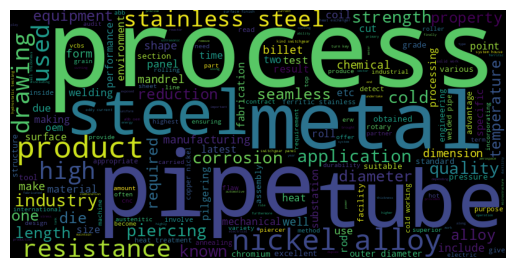

In [103]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Generate wordcloud from top vendor descriptions
top_vendor_text = ' '.join(df.nlargest(3, 'final_score')['description'])
wordcloud = WordCloud(width=800, height=400).generate(top_vendor_text)
plt.imshow(wordcloud)
plt.axis('off')

## Additional Approaches

In [30]:
import asyncio
from playwright.async_api import async_playwright
from bs4 import BeautifulSoup
import pandas as pd
from tqdm.notebook import tqdm

# Helper function to extract about section
def extract_about_text(soup):
    selectors = ["div", "section", "p"]
    about_candidates = []

    for tag in selectors:
        about_candidates += soup.find_all(tag, id=lambda x: x and "about" in x.lower())
        about_candidates += soup.find_all(tag, class_=lambda x: x and "about" in x.lower())

    about_texts = [el.get_text(separator=" ", strip=True) for el in about_candidates if el.get_text(strip=True)]
    about_text = " ".join(about_texts)
    return about_text.strip() if len(about_text) > 100 else None


In [31]:
async def scrape_about_us_async(url):
    try:
        async with async_playwright() as p:
            browser = await p.chromium.launch(headless=True)
            page = await browser.new_page()
            await page.goto(url, timeout=60000)
            await page.wait_for_load_state("load")

            # STEP 1: Initial parse
            html = await page.content()
            soup = BeautifulSoup(html, "html.parser")
            about_text = extract_about_text(soup)

            # STEP 2: If not found, try to find and click "About" tab
            if not about_text:
                links = await page.query_selector_all("a")
                about_link_found = False

                for link in links:
                    try:
                        text = await link.inner_text()
                        if any(variant in text.lower() for variant in ["about", "about us"]):
                            href = await link.get_attribute("href")
                            if href and not href.startswith("#"):
                                await page.goto(href if "http" in href else url.rstrip("/") + "/" + href.lstrip("/"))
                            else:
                                await link.click()
                            await page.wait_for_load_state("load")
                            about_link_found = True
                            break
                    except:
                        continue

                # STEP 3: After clicking About tab or following href
                if about_link_found:
                    html = await page.content()
                    soup = BeautifulSoup(html, "html.parser")
                    about_text = extract_about_text(soup)

            await browser.close()
            return about_text if about_text else "[NOT FOUND]"

    except Exception as e:
        return f"[ERROR]: {str(e)}"


In [32]:
# Sample df
# df = pd.DataFrame({'website': ['https://example.com', ...]})

results = []

async def scrape_all(urls):
    for url in tqdm(urls):
        text = await scrape_about_us_async(url)
        results.append(text)

# Run the async job
await scrape_all(df_1['website'].tolist())
df_1['about_section'] = results


  0%|          | 0/46 [00:00<?, ?it/s]

<ipython-input-32-466666d93878>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['about_section'] = results


In [33]:
df_nf = df_1[df_1['about_section'] == '[NOT FOUND]']

In [35]:
df_1

,company name,GST,website,about_text,desc_length,scraping_status,about_section
0,A M STEEL,27AACPG2821R1ZJ,https://www.indiamart.com/am-steels-mumbai/abo...,No 'About Us' section found.,28,Failed,[NOT FOUND]
2,SYMCOM EXIM PRIVATE LIMITED,27AASCS2782C1Z1,https://www.symcomgroup.com/,An appropriate representation of the requested...,132,Failed,[NOT FOUND]
3,A K STEELS,27ABAFA1354Q1ZA,https://www.indiamart.com/a-k-steels-kolhapur/,No 'About Us' section found.,28,Failed,[NOT FOUND]
5,IDEAL PROFILERS,27AADFI8634D1ZF,https://www.idealprofilers.com/,You don't have permission to access / on this ...,63,Failed,[NOT FOUND]
6,SURYA FERROUS ALLOYS PRIVATE LIMITED,27AAHCS8596H1ZM,https://www.suryaalloy.com/,No 'About Us' section found.,28,Failed,[NOT FOUND]
13,DEVANSH METALMART,27AAOFD5023A1ZU,https://www.metalmarts.com/,An appropriate representation of the requested...,132,Failed,[NOT FOUND]
15,SANGHAVI INDUSTRIES PVT.LTD.,27AACCS1803J1ZI,https://www.sanghavigroup.com/,No 'About Us' section found.,28,Failed,[NOT FOUND]
18,S W METAFORM PVT. LTD.,27AAICS7392E1ZZ,https://www.swmetaform.com/,Read More,9,Failed,[NOT FOUND]
19,AMBHE FERRO METAL PROCESSORS PVT LTD,27AAACA3873E1ZV,https://ambhe.com/,An appropriate representation of the requested...,132,Failed,[NOT FOUND]
30,NANO-MAG TECHNOLOGIES PRIVATE LIMITED,27AADCN1553H1ZK,https://www.nanomagtech.com/,An appropriate representation of the requested...,132,Failed,[NOT FOUND]


In [ ]:
import asyncio
import pandas as pd
from playwright.async_api import async_playwright
from bs4 import BeautifulSoup

df = df_nf

ABOUT_TERMS = ["about", "About", "ABOUT", "about us", "About Us", "ABOUT US", "who we are", "Who We Are", "WHO WE ARE"]

def extract_about_text(html):
    soup = BeautifulSoup(html, "html.parser")
    for tag in soup.find_all(["section", "div", "p", "article"]):
        text = tag.get_text(separator=" ", strip=True)
        if any(term in text for term in ABOUT_TERMS) and len(text) > 100:
            return text
    return ""

async def extract_about_from_site(url, context):
    try:
        page = await context.new_page()
        await page.goto(url, timeout=20000)
        await page.wait_for_load_state('networkidle')

        # Search for "About" buttons/links and click them
        for tag in ['a', 'button', 'li', 'span', 'div']:
            elements = await page.query_selector_all(tag)
            for el in elements:
                try:
                    text = (await el.inner_text()).strip()
                    if text in ABOUT_TERMS:
                        await el.click()
                        await page.wait_for_timeout(3000)
                        content = await page.content()
                        result = extract_about_text(content)
                        if result:
                            await page.close()
                            return result
                except: continue

        # Try to navigate to about-like links (e.g. /about)
        anchors = await page.query_selector_all("a")
        for a in anchors:
            try:
                href = await a.get_attribute("href")
                if href and any(term in href for term in ["about", "About", "ABOUT"]):
                    abs_url = href if href.startswith("http") else url.rstrip("/") + "/" + href.lstrip("/")
                    await page.goto(abs_url, timeout=10000)
                    await page.wait_for_load_state('networkidle')
                    html = await page.content()
                    result = extract_about_text(html)
                    if result:
                        await page.close()
                        return result
            except: continue

        # Fallback: scrape body content
        content = await page.content()
        await page.close()
        return extract_about_text(content)

    except Exception as e:
        return f"[FAILED]: {str(e)}"

async def process_all(df):
    async with async_playwright() as p:
        browser = await p.chromium.launch(headless=True)
        context = await browser.new_context()
        results = []
        for url in df["website"]:
            print(f"Processing: {url}")
            text = await extract_about_from_site(url, context)
            results.append(text)
        await browser.close()
        df["about_content"] = results
        return df

# Run this to kick off the process
updated_df = asyncio.run(process_all(df))
print(updated_df.head())


In [ ]:
import asyncio
import pandas as pd
from playwright.async_api import async_playwright
from bs4 import BeautifulSoup

df = df_nf

ABOUT_TERMS = ["about", "About", "ABOUT", "about us", "About Us", "ABOUT US", "who we are", "Who We Are", "WHO WE ARE"]

def extract_about_text(html):
    soup = BeautifulSoup(html, "html.parser")
    for tag in soup.find_all(["section", "div", "p", "article"]):
        text = tag.get_text(separator=" ", strip=True)
        if any(term in text for term in ABOUT_TERMS) and len(text) > 100:
            return text
    return ""

async def extract_about_from_site(url, context):
    try:
        page = await context.new_page()
        await page.goto(url, timeout=20000)
        await page.wait_for_load_state('networkidle')

        # Search for "About" buttons/links and click them
        for tag in ['a', 'button', 'li', 'span', 'div']:
            elements = await page.query_selector_all(tag)
            for el in elements:
                try:
                    text = (await el.inner_text()).strip()
                    if text in ABOUT_TERMS:
                        await el.click()
                        await page.wait_for_timeout(3000)
                        content = await page.content()
                        result = extract_about_text(content)
                        if result:
                            await page.close()
                            return result
                except: continue

        # Try to navigate to about-like links (e.g. /about)
        anchors = await page.query_selector_all("a")
        for a in anchors:
            try:
                href = await a.get_attribute("href")
                if href and any(term in href for term in ["about", "About", "ABOUT"]):
                    abs_url = href if href.startswith("http") else url.rstrip("/") + "/" + href.lstrip("/")
                    await page.goto(abs_url, timeout=10000)
                    await page.wait_for_load_state('networkidle')
                    html = await page.content()
                    result = extract_about_text(html)
                    if result:
                        await page.close()
                        return result
            except: continue

        # Fallback: scrape body content
        content = await page.content()
        await page.close()
        return extract_about_text(content)

    except Exception as e:
        return f"[FAILED]: {str(e)}"

async def process_all(df):
    async with async_playwright() as p:
        browser = await p.chromium.launch(headless=True)
        context = await browser.new_context()
        results = []
        for url in df["website"]:
            print(f"Processing: {url}")
            text = await extract_about_from_site(url, context)
            results.append(text)
        await browser.close()
        df["about_content"] = results
        return df

# Instead of asyncio.run, use the following in a Jupyter Notebook environment:
# This ensures the code runs within the existing event loop
import nest_asyncio
nest_asyncio.apply()

updated_df = asyncio.run(process_all(df)) # Now this will run within the existing event loop
print(updated_df.head())

In [ ]:
import asyncio
import pandas as pd
from playwright.async_api import async_playwright
from bs4 import BeautifulSoup
from urllib.parse import urljoin
import nest_asyncio

nest_asyncio.apply()

df = df_nf.copy()  # ensure you’re not modifying the original df

ABOUT_TERMS = [
    "about", "About", "ABOUT",
    "about us", "About Us", "ABOUT US",
    "who we are", "Who We Are", "WHO WE ARE"
]

def extract_about_text(html):
    soup = BeautifulSoup(html, "html.parser")
    for tag in soup.find_all(["section", "div", "p", "article"]):
        text = tag.get_text(separator=" ", strip=True)
        if any(term in text for term in ABOUT_TERMS) and len(text) > 100:
            return text
    return ""

async def extract_about_from_site(url, context):
    page = await context.new_page()
    try:
        await page.goto(url, timeout=20000)
        await page.wait_for_load_state('networkidle')

        # First pass: click known About terms
        for tag in ['a', 'button', 'li', 'span', 'div']:
            elements = await page.query_selector_all(tag)
            for el in elements:
                try:
                    text = (await el.inner_text()).strip()
                    if text in ABOUT_TERMS:
                        await el.click()
                        await page.wait_for_timeout(3000)
                        content = await page.content()
                        result = extract_about_text(content)
                        if result:
                            return result
                except Exception as e:
                    continue  # ignore if the element isn't clickable or errors out

        # Fallback: follow anchor links with about-like hrefs
        anchors = await page.query_selector_all("a")
        for a in anchors:
            try:
                href = await a.get_attribute("href")
                if href and any(term in href for term in ["about", "About", "ABOUT"]):
                    target_url = urljoin(url, href)
                    await page.goto(target_url, timeout=10000)
                    await page.wait_for_load_state('networkidle')
                    html = await page.content()
                    result = extract_about_text(html)
                    if result:
                        return result
            except Exception as e:
                continue  # just skip broken links

        # Final fallback: try current content
        html = await page.content()
        return extract_about_text(html)

    except Exception as e:
        return f"[FAILED]: {str(e)}"

    finally:
        await page.close()  # always close page once, after everything

async def process_all(df):
    async with async_playwright() as p:
        browser = await p.chromium.launch(headless=True)
        context = await browser.new_context()
        results = []
        for url in df["website"]:
            print(f"Processing: {url}")
            try:
                text = await extract_about_from_site(url, context)
                results.append(text)
            except Exception as e:
                results.append(f"[ERROR]: {str(e)}")
        await browser.close()
        df["about_content"] = results
        return df

updated_df = asyncio.run(process_all(df))
print(updated_df.head())


In [ ]:
import asyncio
import pandas as pd
from playwright.async_api import async_playwright
from bs4 import BeautifulSoup
from urllib.parse import urljoin
import nest_asyncio

nest_asyncio.apply()

df = df_nf.copy()

ABOUT_TERMS = [
    "about", "About", "ABOUT",
    "about us", "About Us", "ABOUT US",
    "who we are", "Who We Are", "WHO WE ARE"
]

def extract_about_text(html):
    soup = BeautifulSoup(html, "html.parser")
    for tag in soup.find_all(["section", "div", "p", "article"]):
        text = tag.get_text(separator=" ", strip=True)
        if any(term in text for term in ABOUT_TERMS) and len(text) > 100:
            return text
    return ""

async def extract_about_from_site(url, context, sem):
    async with sem:
        page = await context.new_page()
        try:
            await page.goto(url, timeout=20000)
            await page.wait_for_load_state('networkidle')

            for tag in ['a', 'button', 'li', 'span', 'div']:
                elements = await page.query_selector_all(tag)
                for el in elements:
                    try:
                        text = (await el.inner_text()).strip()
                        if text in ABOUT_TERMS:
                            await el.click()
                            await page.wait_for_timeout(3000)
                            content = await page.content()
                            result = extract_about_text(content)
                            if result:
                                return result
                    except: continue

            anchors = await page.query_selector_all("a")
            for a in anchors:
                try:
                    href = await a.get_attribute("href")
                    if href and any(term in href for term in ["about", "About", "ABOUT"]):
                        target_url = urljoin(url, href)
                        await page.goto(target_url, timeout=10000)
                        await page.wait_for_load_state('networkidle')
                        html = await page.content()
                        result = extract_about_text(html)
                        if result:
                            return result
                except: continue

            html = await page.content()
            return extract_about_text(html)

        except Exception as e:
            return f"[FAILED]: {str(e)}"
        finally:
            await page.close()

async def process_all(df, max_concurrency=10):
    async with async_playwright() as p:
        browser = await p.chromium.launch(headless=True)
        context = await browser.new_context()
        sem = asyncio.Semaphore(max_concurrency)

        tasks = [
            extract_about_from_site(url, context, sem)
            for url in df["website"]
        ]
        results = await asyncio.gather(*tasks)
        await browser.close()
        df["about_content"] = results
        return df

updated_df = asyncio.run(process_all(df, max_concurrency=10))
print(updated_df.head())

In [ ]:
updated_df

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from urllib.parse import urljoin

# Replace with your actual dataframe
df = df_nf.copy()

ABOUT_TERMS = ["about", "about us", "who we are"]
CASE_SENSITIVE_TERMS = ["About", "About Us", "Who We Are", "ABOUT", "ABOUT US", "WHO WE ARE"]

def extract_text(soup):
    texts = soup.find_all(['section', 'div', 'p', 'article'])
    for tag in texts:
        text = tag.get_text(separator=" ", strip=True)
        if any(term in text for term in CASE_SENSITIVE_TERMS) and len(text) > 100:
            return text
    return ""

def find_about_link(soup, base_url):
    for link in soup.find_all('a', href=True):
        href = link['href']
        text = link.get_text(strip=True)
        if any(term in href or term == text for term in ABOUT_TERMS + CASE_SENSITIVE_TERMS):
            return urljoin(base_url, href)
    return None

def scrape_about(url):
    try:
        r = requests.get(url, timeout=10, headers={'User-Agent': 'Mozilla/5.0'})
        soup = BeautifulSoup(r.text, 'html.parser')

        # 1. Check homepage
        text = extract_text(soup)
        if text:
            return text

        # 2. Try to find an About Us link
        about_url = find_about_link(soup, url)
        if about_url:
            r2 = requests.get(about_url, timeout=10, headers={'User-Agent': 'Mozilla/5.0'})
            soup2 = BeautifulSoup(r2.text, 'html.parser')
            return extract_text(soup2)

        return "[Not Found]"

    except Exception as e:
        return f"[Error] {str(e)}"

# Apply to all URLs
df["about_content"] = df["website"].apply(scrape_about)
df.head()
